**Kannada News Classification**

In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path

In [ ]:
!nvidia-smi

Wed Oct  4 12:00:47 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch
torch.cuda.is_available()
# Output would be True if Pytorch is using GPU otherwise it would be False.

True

In [ ]:
path = Path('./')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train = pd.read_csv(path/'/content/drive/MyDrive/Kannada News Classification/kn-train.csv', header=None)
df_train.head()

,0,1
0,sports,Samsung Galaxy M30s: ಲಭ್ಯವಾಗಲಿದೆ ಶಕ್ತಿಶಾಲಿ ಸ್ಮ...
1,sports,ಯುವೆಂಟಸ್ ತಂಡ ಸೇರಿದ ಕ್ರಿಸ್ಟಿಯಾನೊ ರೊನಾಲ್ಡೊ\nಯುವೆ...
2,sports,"ಬ್ಯಾಡ್ಮಿಂಟನ್‌: ಎರಡನೇ ಸುತ್ತಿಗೆ ಸಿಂಧು, ಸಮೀರ್‌\nಬ..."
3,entertainment,ತಮ್ಮದು ಒಪ್ಪಿತ ʼಸಂಬಂಧʼ ಎಂದು ಹೇಳಿದ ನಟ\n 12-05-2...
4,sports,ಖ್ಯಾತ ಕ್ರಿಕೆಟಿಗನ ಪತ್ನಿ ನಿಧನ\n 31-12-2018 7:57...


In [ ]:
df_train = pd.read_csv(path/'/content/drive/MyDrive/Kannada News Classification/kn-valid.csv', header=None)
df_train.head()

,0,1
0,sports,IPL 2018 ಟಾಸ್ ಗೆದ್ದ ಸಿಎಸ್’ಕೆ ಫೀಲ್ಡಿಂಗ್ ಆಯ್ಕೆ\n...
1,entertainment,‘ದೇಹಿ’ ಚಿತ್ರದಲ್ಲಿ ಕಳರಿಪಯಟ್ಟು ಆ್ಯಕ್ಷನ್‌\n‘ದೇಹಿ’...
2,entertainment,ಮಕ್ಕಳ ಬರ್ತಡೇಯನ್ನು ಸ್ಪೆಷಲ್ ಆಗಿ ಸೆಲಬ್ರೇಟ್ ಮಾಡಿದ ...
3,entertainment,ಕೆಂಪೇಗೌಡ 2ನಲ್ಲಿ ಸುದೀಪ್ ಇರುತ್ತಾರಾ?\nHighlights\...
4,sports,(ವಿಡಿಯೋ)ಜಾಧವ್ ಮೇಲೆ ಮೈದಾನದಲ್ಲೇ ಸಿಟ್ಟಾದ ಧೋನಿ!: ಆ...


In [ ]:
df_train = pd.read_csv(path/'/content/drive/MyDrive/Kannada News Classification/kn-test.csv', header=None)
df_train.head()

,0,1
0,sports,"ವಿಂಡೀಸ್‌ ತಂಡಕ್ಕೆ ಮರಳಿದ ಸುನೀಲ್‌, ಪೊಲ್ಲಾರ್ಡ್‌\n‌..."
1,entertainment,ರಂಗದಲ್ಲಿ ಕಮಲಾದೇವಿ ಚಟ್ಟೋಪಾಧ್ಯಾಯ\nkamaladevi cha...
2,entertainment,"Bengaluru, First Published 23, Nov 2018, 9:38 ..."
3,sports,"ಅಧ್ಯಯನ, ಅಭ್ಯಾಸದ ಗೊಂದಲದಲ್ಲಿ ಹಿಮಾ ದಾಸ್‌\nಅಧ್ಯಯನ,..."
4,lifestyle,ದೇಶ ಜೀವನದ ಕೊನೆಯ ಹಂತದಲ್ಲಿ ಆರೋಗ್ಯದ ದುಃಸ್ಥಿತಿ!\nJ...


In [ ]:
df_train = pd.read_csv(path/'/content/drive/MyDrive/Kannada News Classification/stopwords-kn.txt', header=None)
df_train.head()

,0
0,ಮತ್ತು
1,ಈ
2,ಒಂದು
3,ರಲ್ಲಿ
4,ಹಾಗೂ


In [ ]:
!pip install vocab
!pip install tokenize

ERROR: Could not find a version that satisfies the requirement tokenize (from versions: none)
ERROR: No matching distribution found for tokenize


In [ ]:
pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.2 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras

In [ ]:
import numpy as np
import tensorflow as tf
import sentencepiece as spm
import vocab
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import re
import tokenize
from sklearn.model_selection import train_test_split
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, SpatialDropout1D
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import tensorflow as tf
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
tf.device('/device:GPU:0')

In [ ]:
import pandas as pd
df_train = pd.read_csv(path/'/content/drive/MyDrive/Kannada News Classification/kn-train.csv', header=None)
df_train.rename(columns={1: 'text', 0: 'target'}, inplace=True)
df_valid = pd.read_csv(path/'/content/drive/MyDrive/Kannada News Classification/kn-valid.csv', header=None)
df_valid.rename(columns={1: 'text', 0: 'target'}, inplace=True)
df_test = pd.read_csv(path/'/content/drive/MyDrive/Kannada News Classification/kn-test.csv', header=None)
df_test.rename(columns={1: 'text', 0: 'target'}, inplace=True)

merge = [df_train, df_test, df_valid]
df_train = pd.concat(merge)

In [ ]:
df_train

,target,text
0,sports,Samsung Galaxy M30s: ಲಭ್ಯವಾಗಲಿದೆ ಶಕ್ತಿಶಾಲಿ ಸ್ಮ...
1,sports,ಯುವೆಂಟಸ್ ತಂಡ ಸೇರಿದ ಕ್ರಿಸ್ಟಿಯಾನೊ ರೊನಾಲ್ಡೊ\nಯುವೆ...
2,sports,"ಬ್ಯಾಡ್ಮಿಂಟನ್‌: ಎರಡನೇ ಸುತ್ತಿಗೆ ಸಿಂಧು, ಸಮೀರ್‌\nಬ..."
3,entertainment,ತಮ್ಮದು ಒಪ್ಪಿತ ʼಸಂಬಂಧʼ ಎಂದು ಹೇಳಿದ ನಟ\n 12-05-2...
4,sports,ಖ್ಯಾತ ಕ್ರಿಕೆಟಿಗನ ಪತ್ನಿ ನಿಧನ\n 31-12-2018 7:57...
...,...,...
2995,entertainment,ಅನುಷ್ಕಾಗೆ ಪಕ್ಕದ್ಮನೆಯವನ ಕಾಟ\nMumbai Mirror| Apr...
2996,entertainment,"ಪ್ರಜಾವಾಣಿ ವಾರ್ತೆ\nPublished:\n30 ನವೆಂಬರ್ 2018,..."
2997,entertainment,#Gomonster Samsung M30s: ಹೊಸ ಸ್ಮಾರ್ಟ್‌ಫೋನ್‌ ನ ...
2998,sports,#Gomonster ಸವಾಲು ಸ್ವೀಕರಿಸಿದ ಅರ್ಜುನ್‌: Samsung ...


In [ ]:
file1 = open(path/'/content/drive/MyDrive/Kannada News Classification/stopwords-kn.txt', 'r')
Lines = file1.readlines()

STOPWORDS = []
count = 0
# Strips the newline character
for line in Lines:
    STOPWORDS.append(line.strip())

In [ ]:
df_train['target'].unique()

array(['sports', 'entertainment', 'lifestyle'], dtype=object)

In [ ]:
df_train = df_train.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

def clean_text(text):
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text
df_train['text'] = df_train['text'].apply(clean_text)
df_train['text'] = df_train['text'].str.replace('\d+', '')

<ipython-input-22-f7c448b6d172>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df_train['text'] = df_train['text'].str.replace('\d+', '')


In [ ]:
df_train

,target,text
0,sports,samsung galaxy ms: ಲಭ್ಯವಾಗಲಿದೆ ಶಕ್ತಿಶಾಲಿ ಸ್ಮಾರ...
1,sports,ಯುವೆಂಟಸ್ ತಂಡ ಸೇರಿದ ಕ್ರಿಸ್ಟಿಯಾನೊ ರೊನಾಲ್ಡೊ ಯುವೆಂ...
2,sports,ಬ್ಯಾಡ್ಮಿಂಟನ್‌: ಎರಡನೇ ಸುತ್ತಿಗೆ ಸಿಂಧು ಸಮೀರ್‌ ಬ್ಯ...
3,entertainment,ತಮ್ಮದು ಒಪ್ಪಿತ ʼಸಂಬಂಧʼ ಹೇಳಿದ ನಟ -- :pm ist no c...
4,sports,ಖ್ಯಾತ ಕ್ರಿಕೆಟಿಗನ ಪತ್ನಿ ನಿಧನ -- :am ist no comm...
...,...,...
29995,entertainment,ಅನುಷ್ಕಾಗೆ ಪಕ್ಕದ್ಮನೆಯವನ ಕಾಟ mumbai mirror apr ...
29996,entertainment,ಪ್ರಜಾವಾಣಿ ವಾರ್ತೆ published: ನವೆಂಬರ್ : ist up...
29997,entertainment,#gomonster samsung ms: ಸ್ಮಾರ್ಟ್‌ಫೋನ್‌ ವಿಶೇಷತೆಗ...
29998,sports,#gomonster ಸವಾಲು ಸ್ವೀಕರಿಸಿದ ಅರ್ಜುನ್‌: samsung ...


In [ ]:
from keras.preprocessing.text import Tokenizer
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df_train['text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 460163 unique tokens.


In [ ]:
# word_index

In [ ]:
X = tokenizer.texts_to_sequences(df_train['text'].values)
X = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (30000, 250)


In [ ]:
Y = pd.get_dummies(df_train['target']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (30000, 3)


In [ ]:
print(Y[3])

[1 0 0]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size = 0.8, random_state = 1)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(24000, 250) (24000, 3)
(6000, 250) (6000, 3)


In [ ]:
model = Sequential() #This line creates a Sequential model, which is a linear stack of layers. You'll be adding layers to this model in the subsequent lines.
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2)) #This line adds an LSTM (Long Short-Term Memory) layer with 100 units. LSTM is a type of recurrent neural network (RNN) that is well-suited for processing sequences of data.
model.add(Dense(3, activation='softmax')) #This line adds a Dense layer with 3 units, which is the output layer. It's using a softmax activation function, which is common for multi-class classification problems.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 3
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/3
338/338 [==============================] - 427s 1s/step - loss: 0.2320 - accuracy: 0.9272 - val_loss: 0.2586 - val_accuracy: 0.9475
Epoch 2/3
338/338 [==============================] - 438s 1s/step - loss: 0.0460 - accuracy: 0.9866 - val_loss: 0.0902 - val_accuracy: 0.9717
Epoch 3/3
338/338 [==============================] - 418s 1s/step - loss: 0.0203 - accuracy: 0.9919 - val_loss: 0.0709 - val_accuracy: 0.9771


188/188 [==============================] - 27s 143ms/step


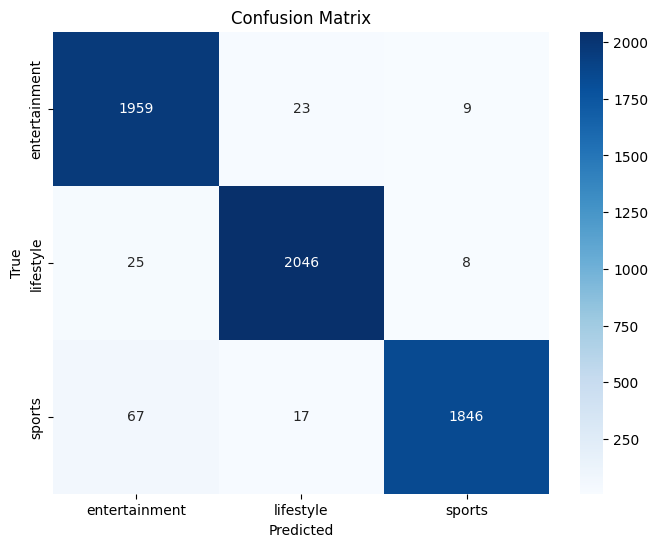

In [ ]:
Y_pred = model.predict(X_test)

Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_test, axis=1)
cm = confusion_matrix(Y_true, Y_pred_classes)
class_labels = ['entertainment', 'lifestyle', 'sports']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

188/188 [==============================] - 14s 73ms/step


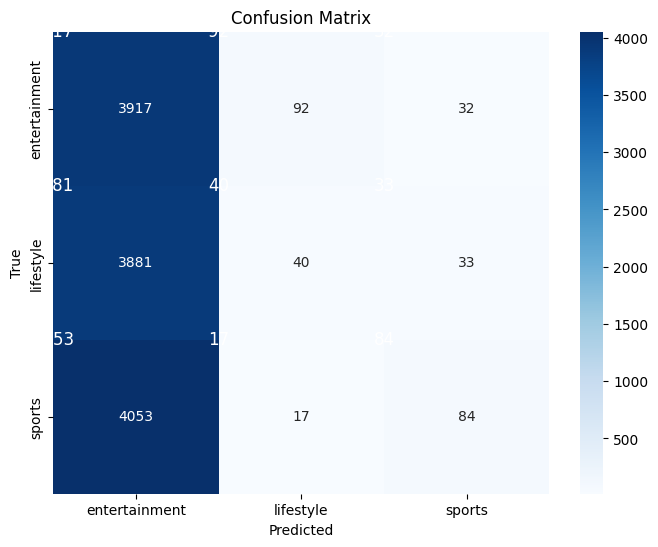

In [ ]:
Y_pred = model.predict(X_test)

Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_test, axis=1)

TP = [np.sum(np.logical_and(Y_true == i, Y_pred_classes == i)) for i in range(3)]
TN = [np.sum(np.logical_and(Y_true != i, Y_pred_classes != i)) for i in range(3)]
FP = [np.sum(np.logical_and(Y_true != i, Y_pred_classes == i)) for i in range(3)]
FN = [np.sum(np.logical_and(Y_true == i, Y_pred_classes != i)) for i in range(3)]

cm = np.array([[TN[0], FP[0], FN[0]],
               [TN[1], FP[1], FN[1]],
               [TN[2], FP[2], FN[2]]])

class_labels = ['entertainment', 'lifestyle', 'sports']


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=class_labels, yticklabels=class_labels)

for i in range(3):
    for j in range(3):
        plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='white', fontsize=12)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# new_text = df_train['text'].head(20)[19:20]
new_text = ["ಗಣೇಶ್, ರುಕ್ಮಿಣಿ ವಸಂತ್, ರೀಷ್ಮಾ ನಾಣಯ್ಯ ಅಭಿನಯದ 'ಬಾನದಾರಿಯಲ್ಲಿ' ಬಿಡುಗಡೆಗೆ ಹೊಸ ದಿನಾಂಕ ಫಿಕ್ಸ್"]
seq = tokenizer.texts_to_sequences(new_text)
padded = tf.keras.preprocessing.sequence.pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['entertainment', 'lifestyle', 'sports']
# print(pred)
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 76ms/step
[[0.7642388  0.20494689 0.03081429]] entertainment


In [ ]:
# new_text = df_train['text'].head(20)[19:20]
new_text = ["ಭಾರತ ವಿರುದ್ಧದ ಮೊದಲ ಪಂದ್ಯಕ್ಕೆ ಆಸ್ಟ್ರೇಲಿಯಾದ ಇಬ್ಬರು ಆಟಗಾರರು ಅಲಭ್ಯ"]
seq = tokenizer.texts_to_sequences(new_text)
padded = tf.keras.preprocessing.sequence.pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['entertainment', 'lifestyle', 'sports']
# print(pred)
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 84ms/step
[[0.02288835 0.0184826  0.958629  ]] sports


In [ ]:
# new_text = df_train['text'].head(20)[19:20]
new_text = ["ಉತ್ತಮ ನಿದ್ರೆಗಾಗಿ ಮಲಗುವ ಮುನ್ನ ನೀವು ಕುಡಿಯಬೇಕಾದ ಪಾನೀಯಗಳು"]
seq = tokenizer.texts_to_sequences(new_text)
padded = tf.keras.preprocessing.sequence.pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['entertainment', 'lifestyle', 'sports']
# print(pred)
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 72ms/step
[[0.01287485 0.95726687 0.0298583 ]] lifestyle


In [ ]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

188/188 [==============================] - 14s 76ms/step - loss: 0.0755 - accuracy: 0.9752
Test set
  Loss: 0.075
  Accuracy: 0.975
